# Dimensionality reduction 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
Axes3D
import seaborn as sns
import numpy as np
from time import time
sns.set()

In [ ]:
n_neighbors = 10
n_components = 2

### Linear Dataset

In [ ]:
z

### Non-linear Dataset

In [2]:
n_points = 1000
X, y = datasets.samples_generator.make_s_curve(n_points, random_state=0)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

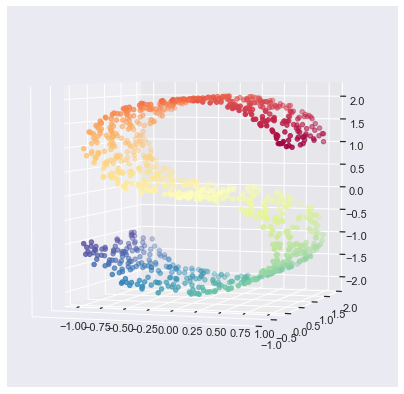

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
ax.set_yticks(np.arange(-1, 2.1, 0.5))

plt.show()

In [5]:
fig_all = plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

In [6]:
def plot_figure(method_num, testing_data=True):
    fig = plt.figure(figsize=(10, 5))
    
    # Training data
    ax = fig.add_subplot(121)
    ax.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train, cmap=plt.cm.Spectral)

    ax_all = fig_all.add_subplot(28*10 + method_num)
    ax_all.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train, cmap=plt.cm.Spectral)

    # Testing data
    if testing_data:
        ax = fig.add_subplot(122)
        ax.scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_test, cmap=plt.cm.Spectral)

    fig.show()

## Linear methods

### PCA

In [25]:
from sklearn.decomposition import PCA

start_time = time()

transformer = PCA(n_components).fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.00s
Transforming time: 0.00s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


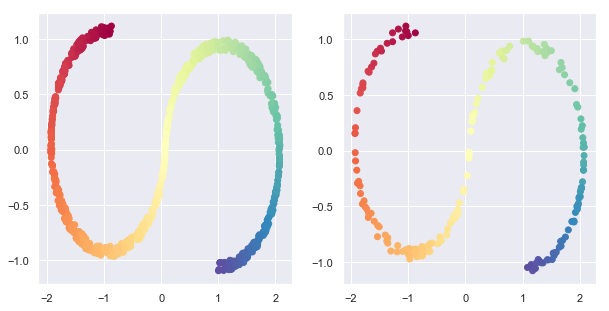

In [26]:
plot_figure(1)

### Factor Analysis

In [27]:
from sklearn.decomposition import FactorAnalysis

start_time = time()

transformer = FactorAnalysis(n_components).fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.00s
Transforming time: 0.00s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


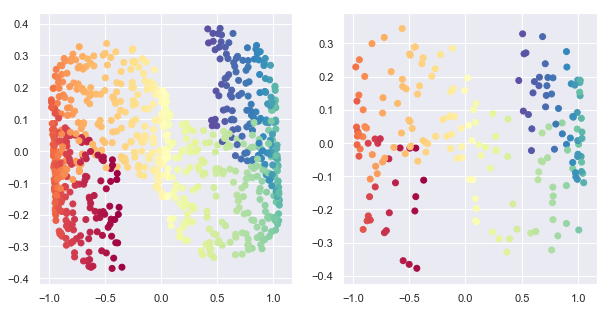

In [28]:
plot_figure(1)

### LDA

### ICA

In [29]:
from sklearn.decomposition import FastICA

start_time = time()

transformer = FastICA(n_components).fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.02s
Transforming time: 0.00s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


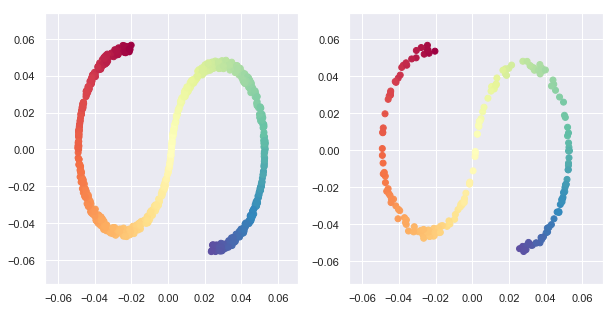

In [30]:
plot_figure(1)

## Non-linear methods

In [7]:
from sklearn import manifold

In [41]:
from sklearn.decomposition import KernelPCA

start_time = time()

# kernels: 'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'
transformer = KernelPCA(n_components, kernel='rbf').fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.02s
Transforming time: 0.02s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


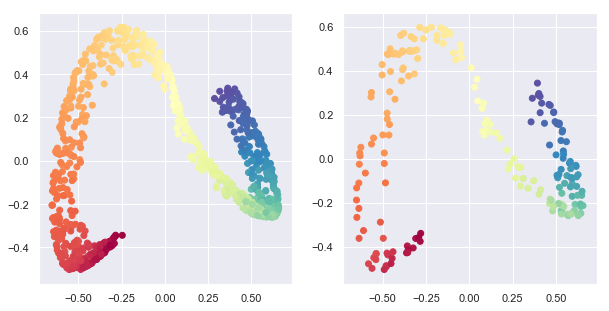

In [42]:
plot_figure(1)

### LLE

In [8]:
start_time = time()

transformer = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method='standard').fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.11s
Transforming time: 0.08s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


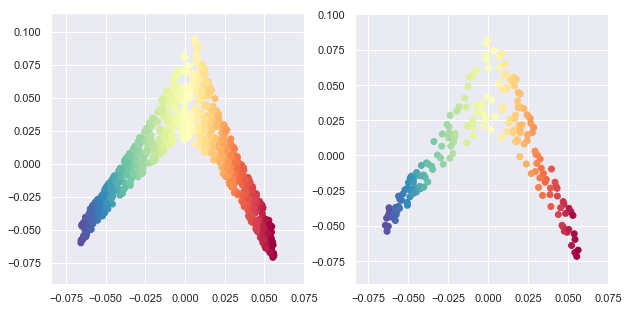

In [9]:
plot_figure(1)

### Hessian LLE

In [10]:
start_time = time()

transformer = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method='hessian').fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.20s
Transforming time: 0.08s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


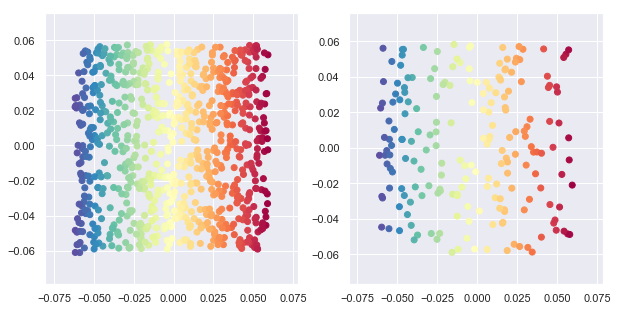

In [11]:
plot_figure(2)

### Modified LLE

In [12]:
start_time = time()

transformer = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method='modified').fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.16s
Transforming time: 0.10s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


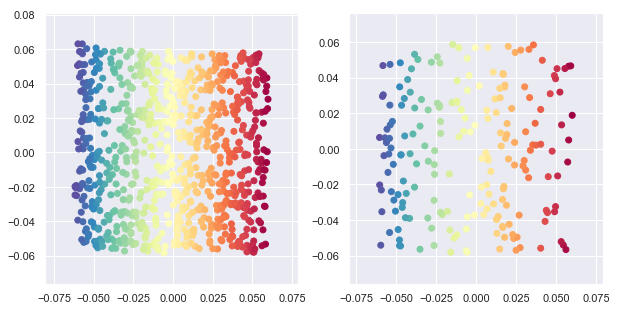

In [13]:
plot_figure(3)

### LTSA

In [14]:
start_time = time()

transformer = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method='ltsa').fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.15s
Transforming time: 0.09s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


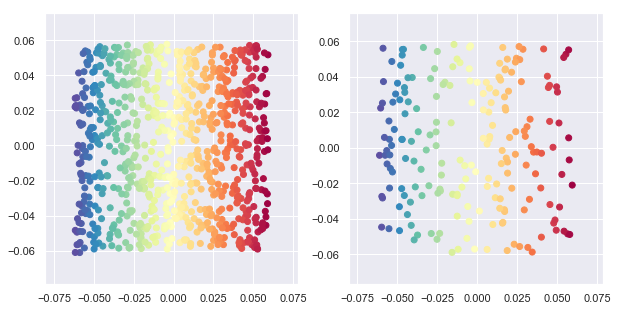

In [15]:
plot_figure(4)

### Isomap

In [16]:
start_time = time()

transformer = manifold.Isomap(n_neighbors, n_components).fit(X_train)
fitting_time = time()

X_train_new = transformer.transform(X_train)
X_test_new = transformer.transform(X_test)

print('Fitting time: %.2fs' % (fitting_time - start_time))
print('Transforming time: %.2fs' % (time() - fitting_time))

Fitting time: 0.23s
Transforming time: 0.05s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


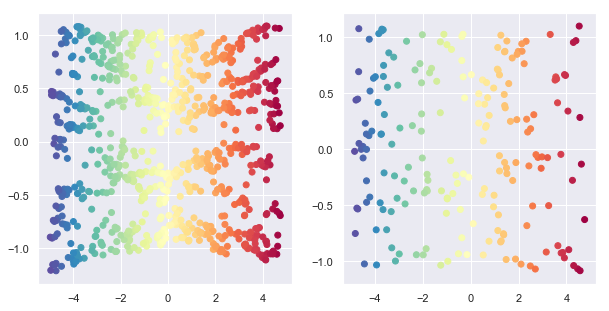

In [17]:
plot_figure(5)

### MDS (Multi-dimensional scaling)

In [50]:
# It’s not a transformer method. It works only for one dataset. 
# You can’t fit it to training data and then transform the testing data.
# The model is not really applicable beyond the data points it is fed as training.

start_time = time()

transformer = manifold.MDS(n_components, max_iter=100, n_init=1)

X_train_new = transformer.fit_transform(X_train)

print('Total time: %.2fs' % (time() - start_time))

Total time: 1.94s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


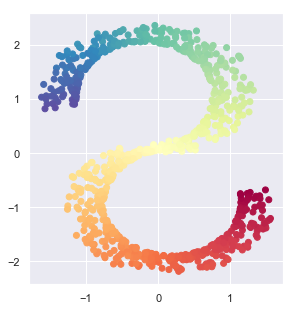

In [51]:
plot_figure(6, testing_data=False)

In [52]:
X_train_new

array([[-0.98713895, -1.6619577 ],
       [ 1.20784575,  1.15467488],
       [ 0.9324467 ,  0.64043015],
       ...,
       [-0.57996616, -1.94907721],
       [-0.7481401 , -1.89063328],
       [-0.0919591 , -1.94626881]])

### Spectral Embedding (Laplacian Eigenmaps)

In [20]:
start_time = time()

transformer = manifold.SpectralEmbedding(n_components, n_neighbors=n_neighbors)

X_train_new = transformer.fit_transform(X_train)

print('Total time: %.2fs' % (time() - start_time))

Total time: 0.08s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


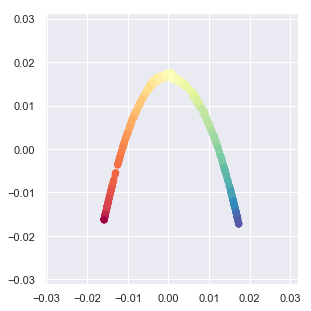

In [21]:
plot_figure(7, testing_data=False)

### T-SNE (t-distributed Stochastic Neighbour Embedding)

In [22]:
start_time = time()

transformer = manifold.TSNE(n_components, init='pca', random_state=0)

X_train_new = transformer.fit_transform(X_train)

print('Total time: %.2fs' % (time() - start_time))

Total time: 4.55s


C:\Users\Piotr.Papiez\AppData\Local\Continuum\miniconda3\envs\gen\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


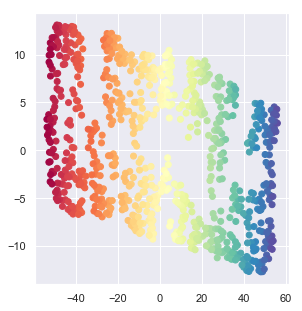

In [23]:
plot_figure(8, testing_data=False)

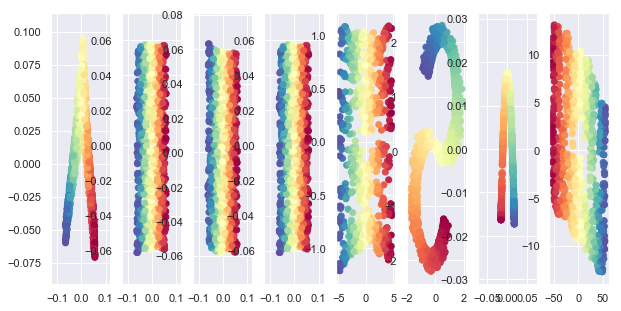

In [24]:
fig_all

## Testing

In [47]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error

In [ ]:
# Use it if you selected features using small subset of data and want to train using 80% of dataset

X_train2 = np.concatenate((X_train, X_test[:14000]))
X_test2 = X_test[14000:18000]

y_train2 = np.concatenate((y_train, y_test[:14000]))
y_test2 = y_test[14000:18000]

X_train_new2 = np.concatenate((X_train_new, X_test_new[:14000]))
X_test_new2 = X_test_new[14000:18000]

### Original dataset:

In [48]:
rfr = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
# pred = rfc.predict_proba(X_test)[:,1]

# print("Accuracy score:" + str(accuracy_score(y_test, pred)))
print("MSE score:" + str(mean_squared_error(y_test, pred)))
# print("AUC score:" + str(roc_auc_score(y_test, pred)))

MSE score:0.019521149280865003


### Modified dataset:

In [49]:
rfr = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

rfr.fit(X_train_new, y_train)
pred = rfr.predict(X_test_new)
# pred = rfc.predict_proba(X_test)[:,1]

# print("Accuracy score:" + str(accuracy_score(y_test, pred)))
print("MSE score:" + str(mean_squared_error(y_test, pred)))
# print("AUC score:" + str(roc_auc_score(y_test, pred)))

MSE score:0.017749387289082767
